In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, davies_bouldin_score
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:/Users/Dell/Downloads/PCA/PCA/wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.info

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [34]:
x = df.iloc[:,:-1]
y = df['Proline']

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

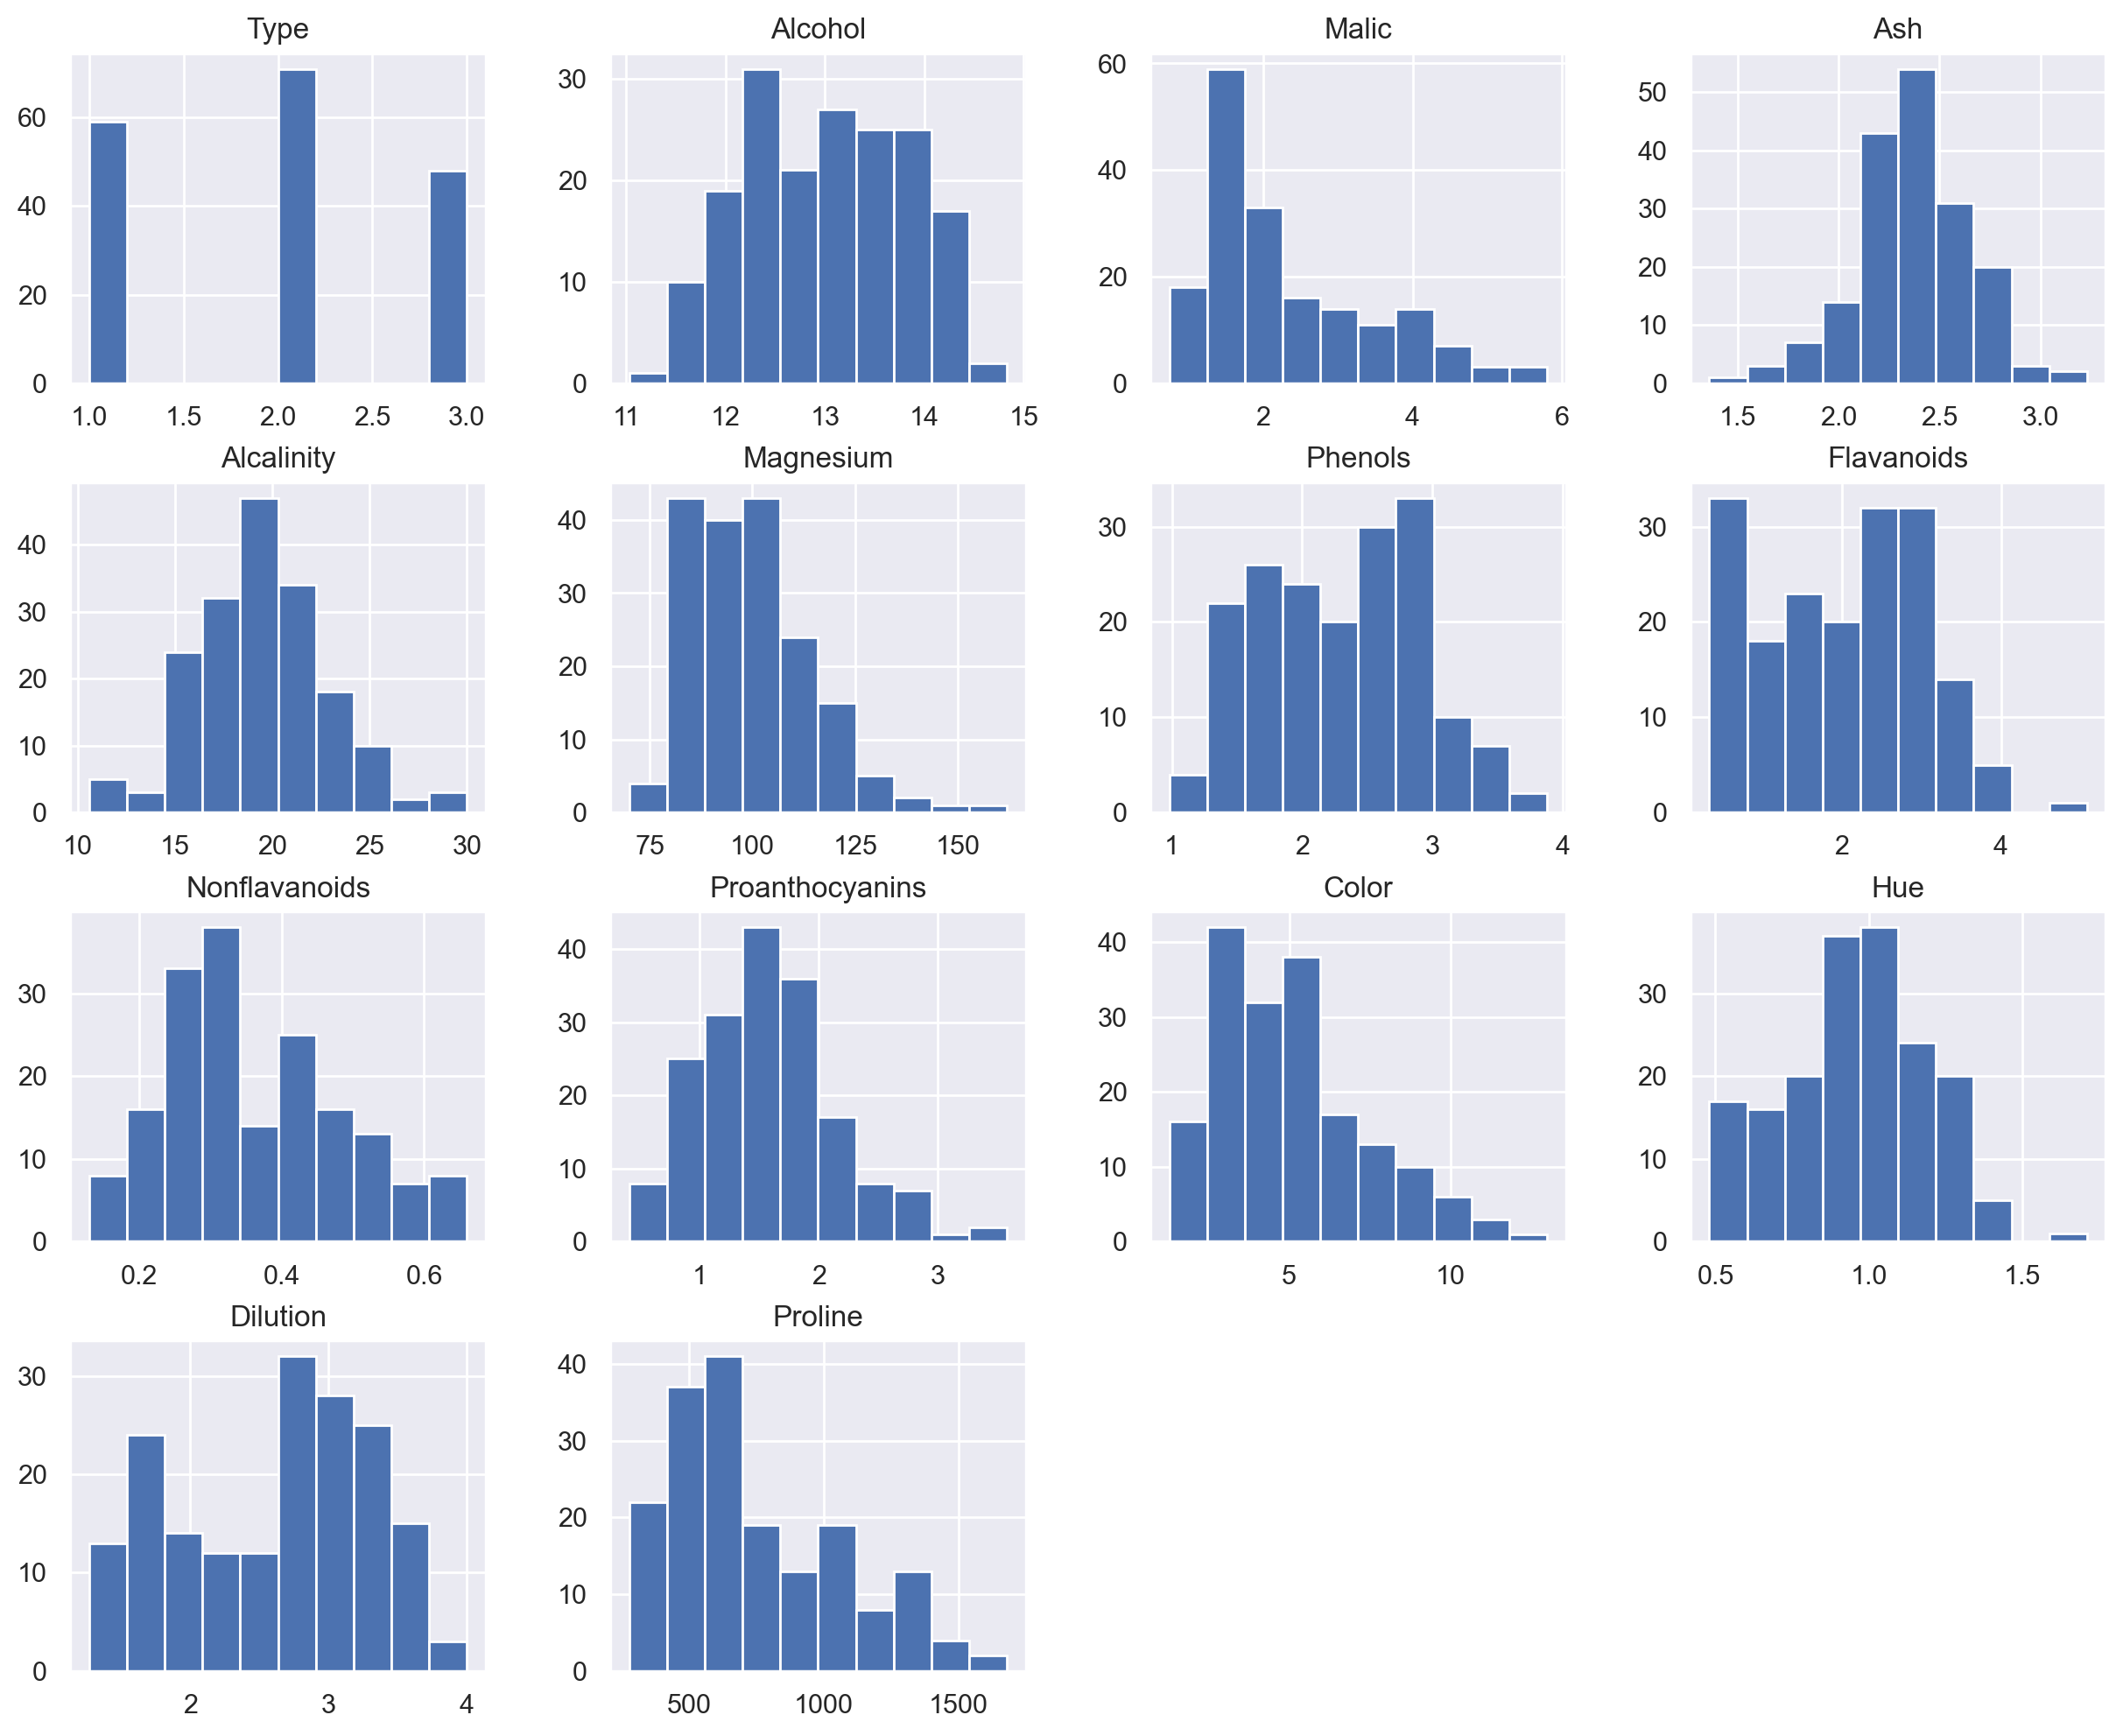

In [7]:
df.hist(figsize=(15,12))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Type'),
  Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Alcalinity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoids'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'Dilution'),
  Text(13, 0, 'Proline')])

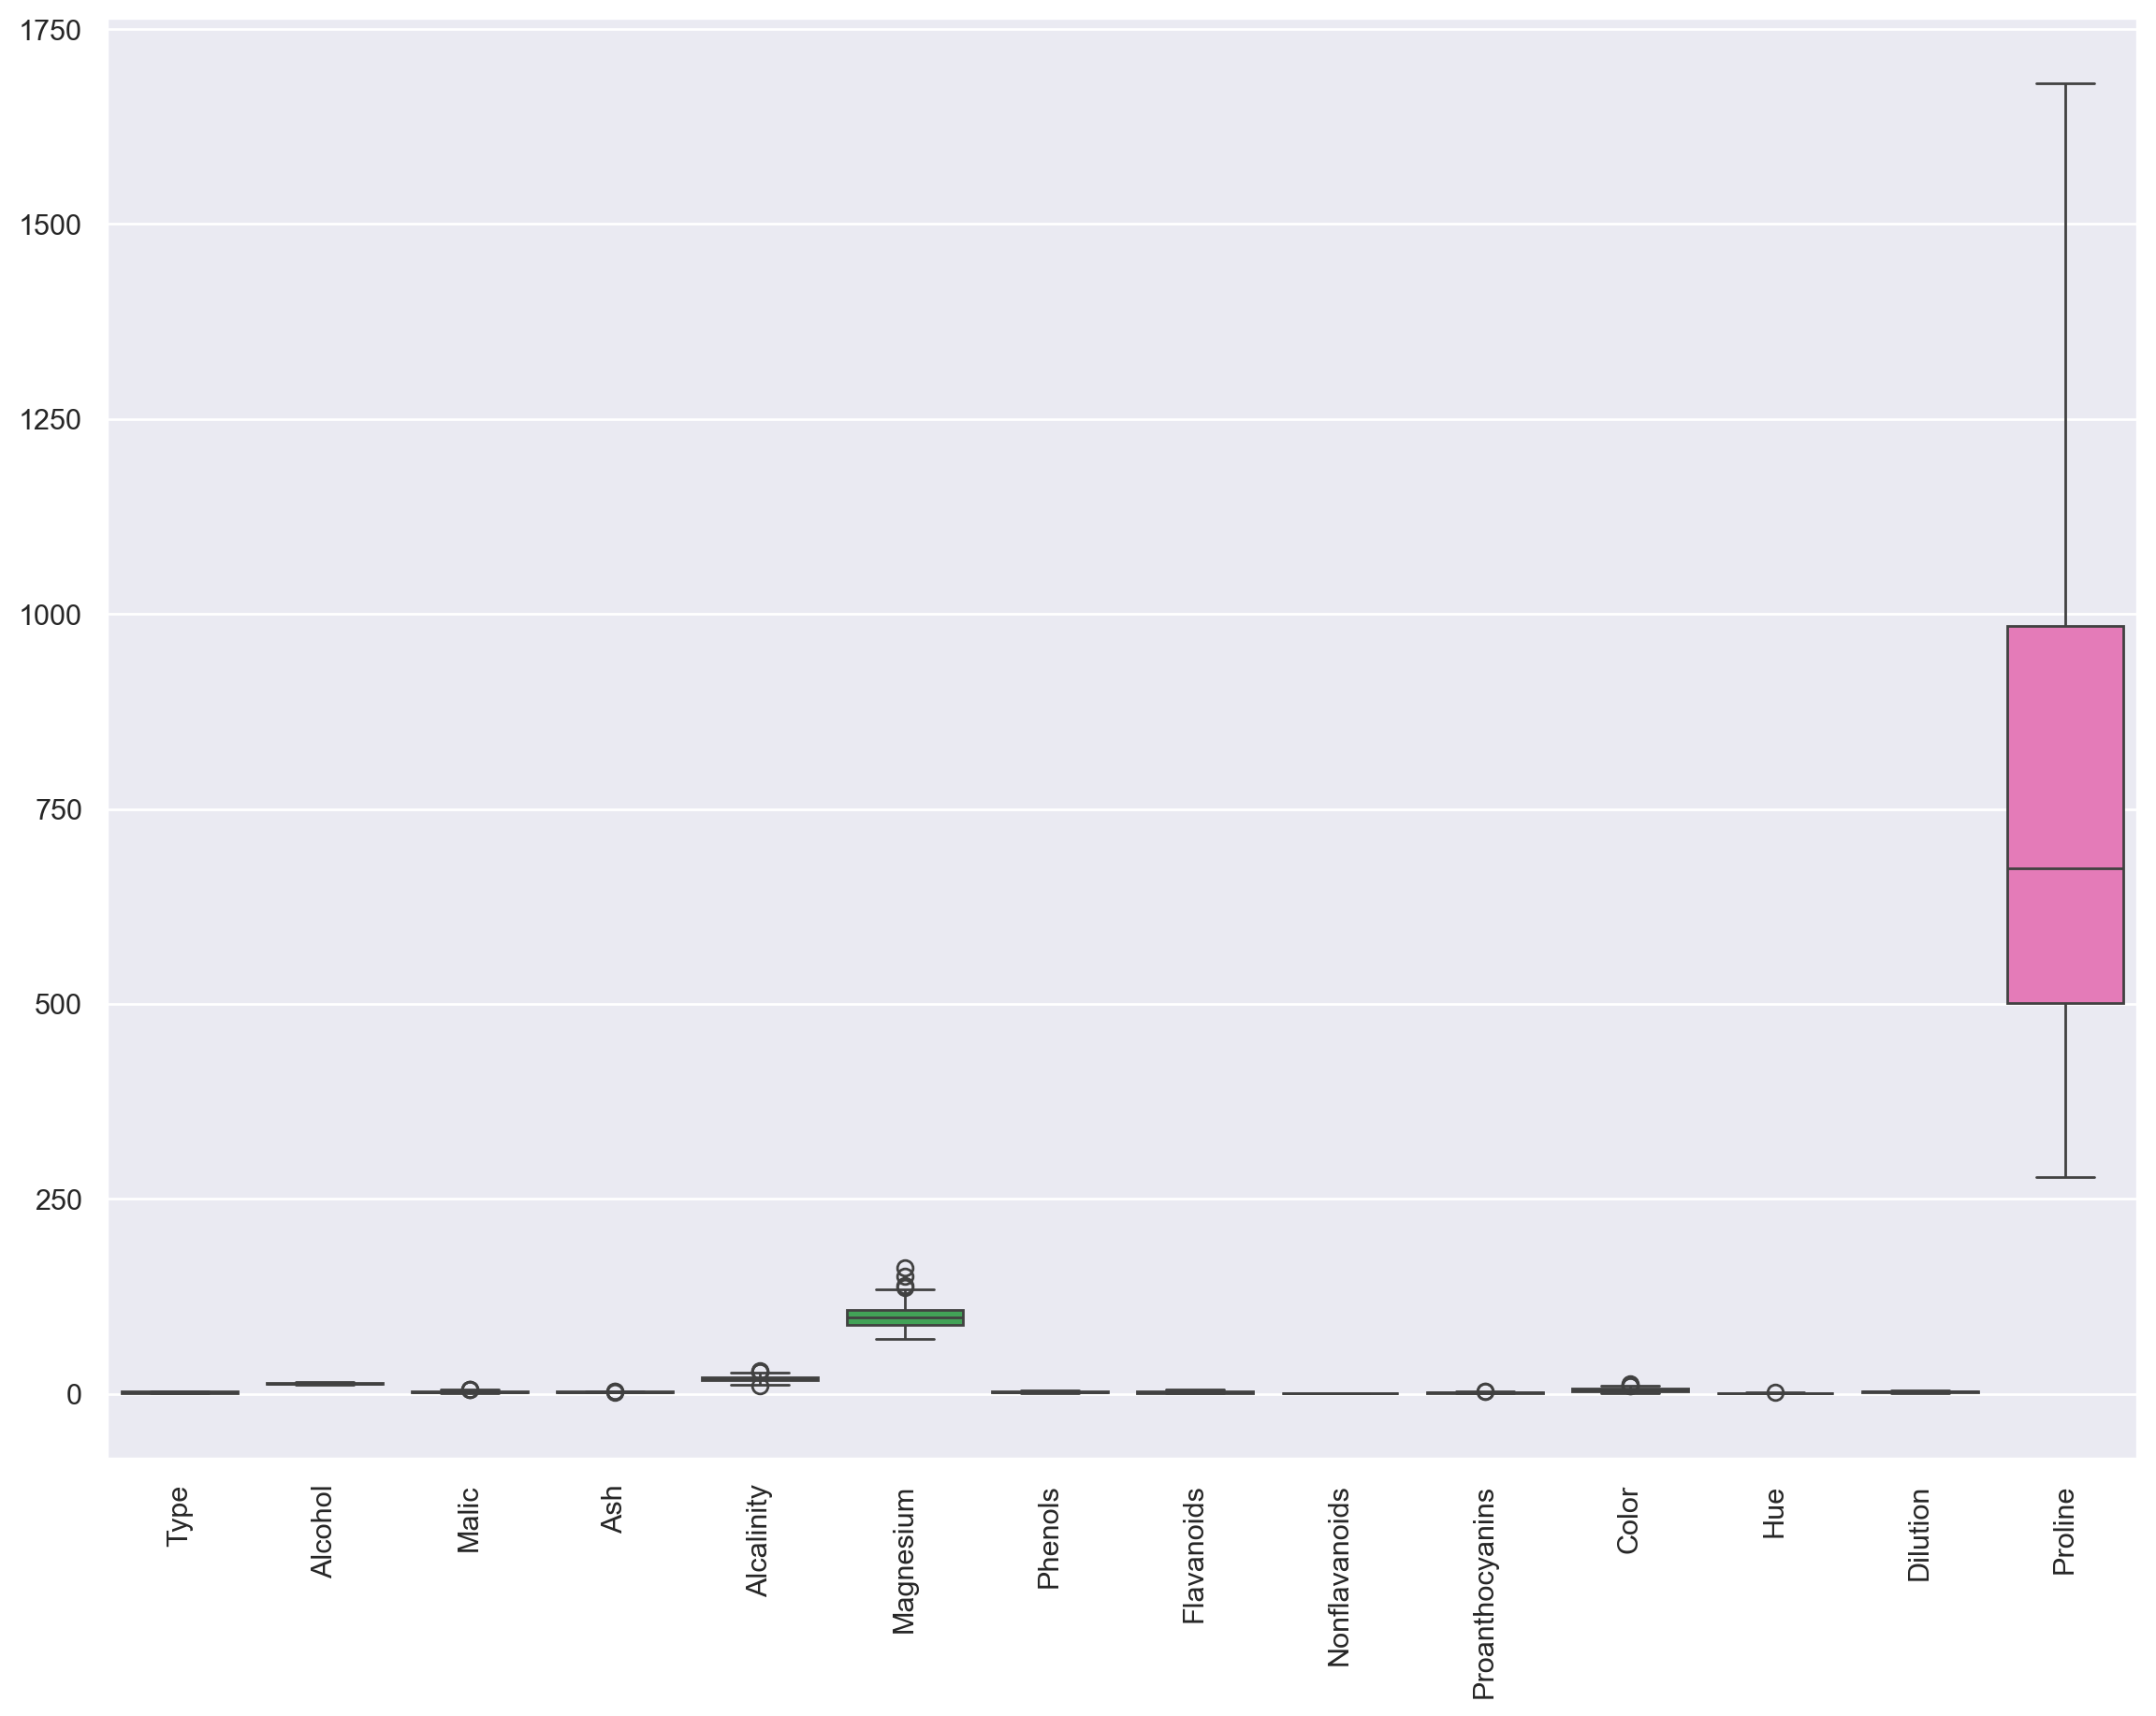

In [8]:
#Boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

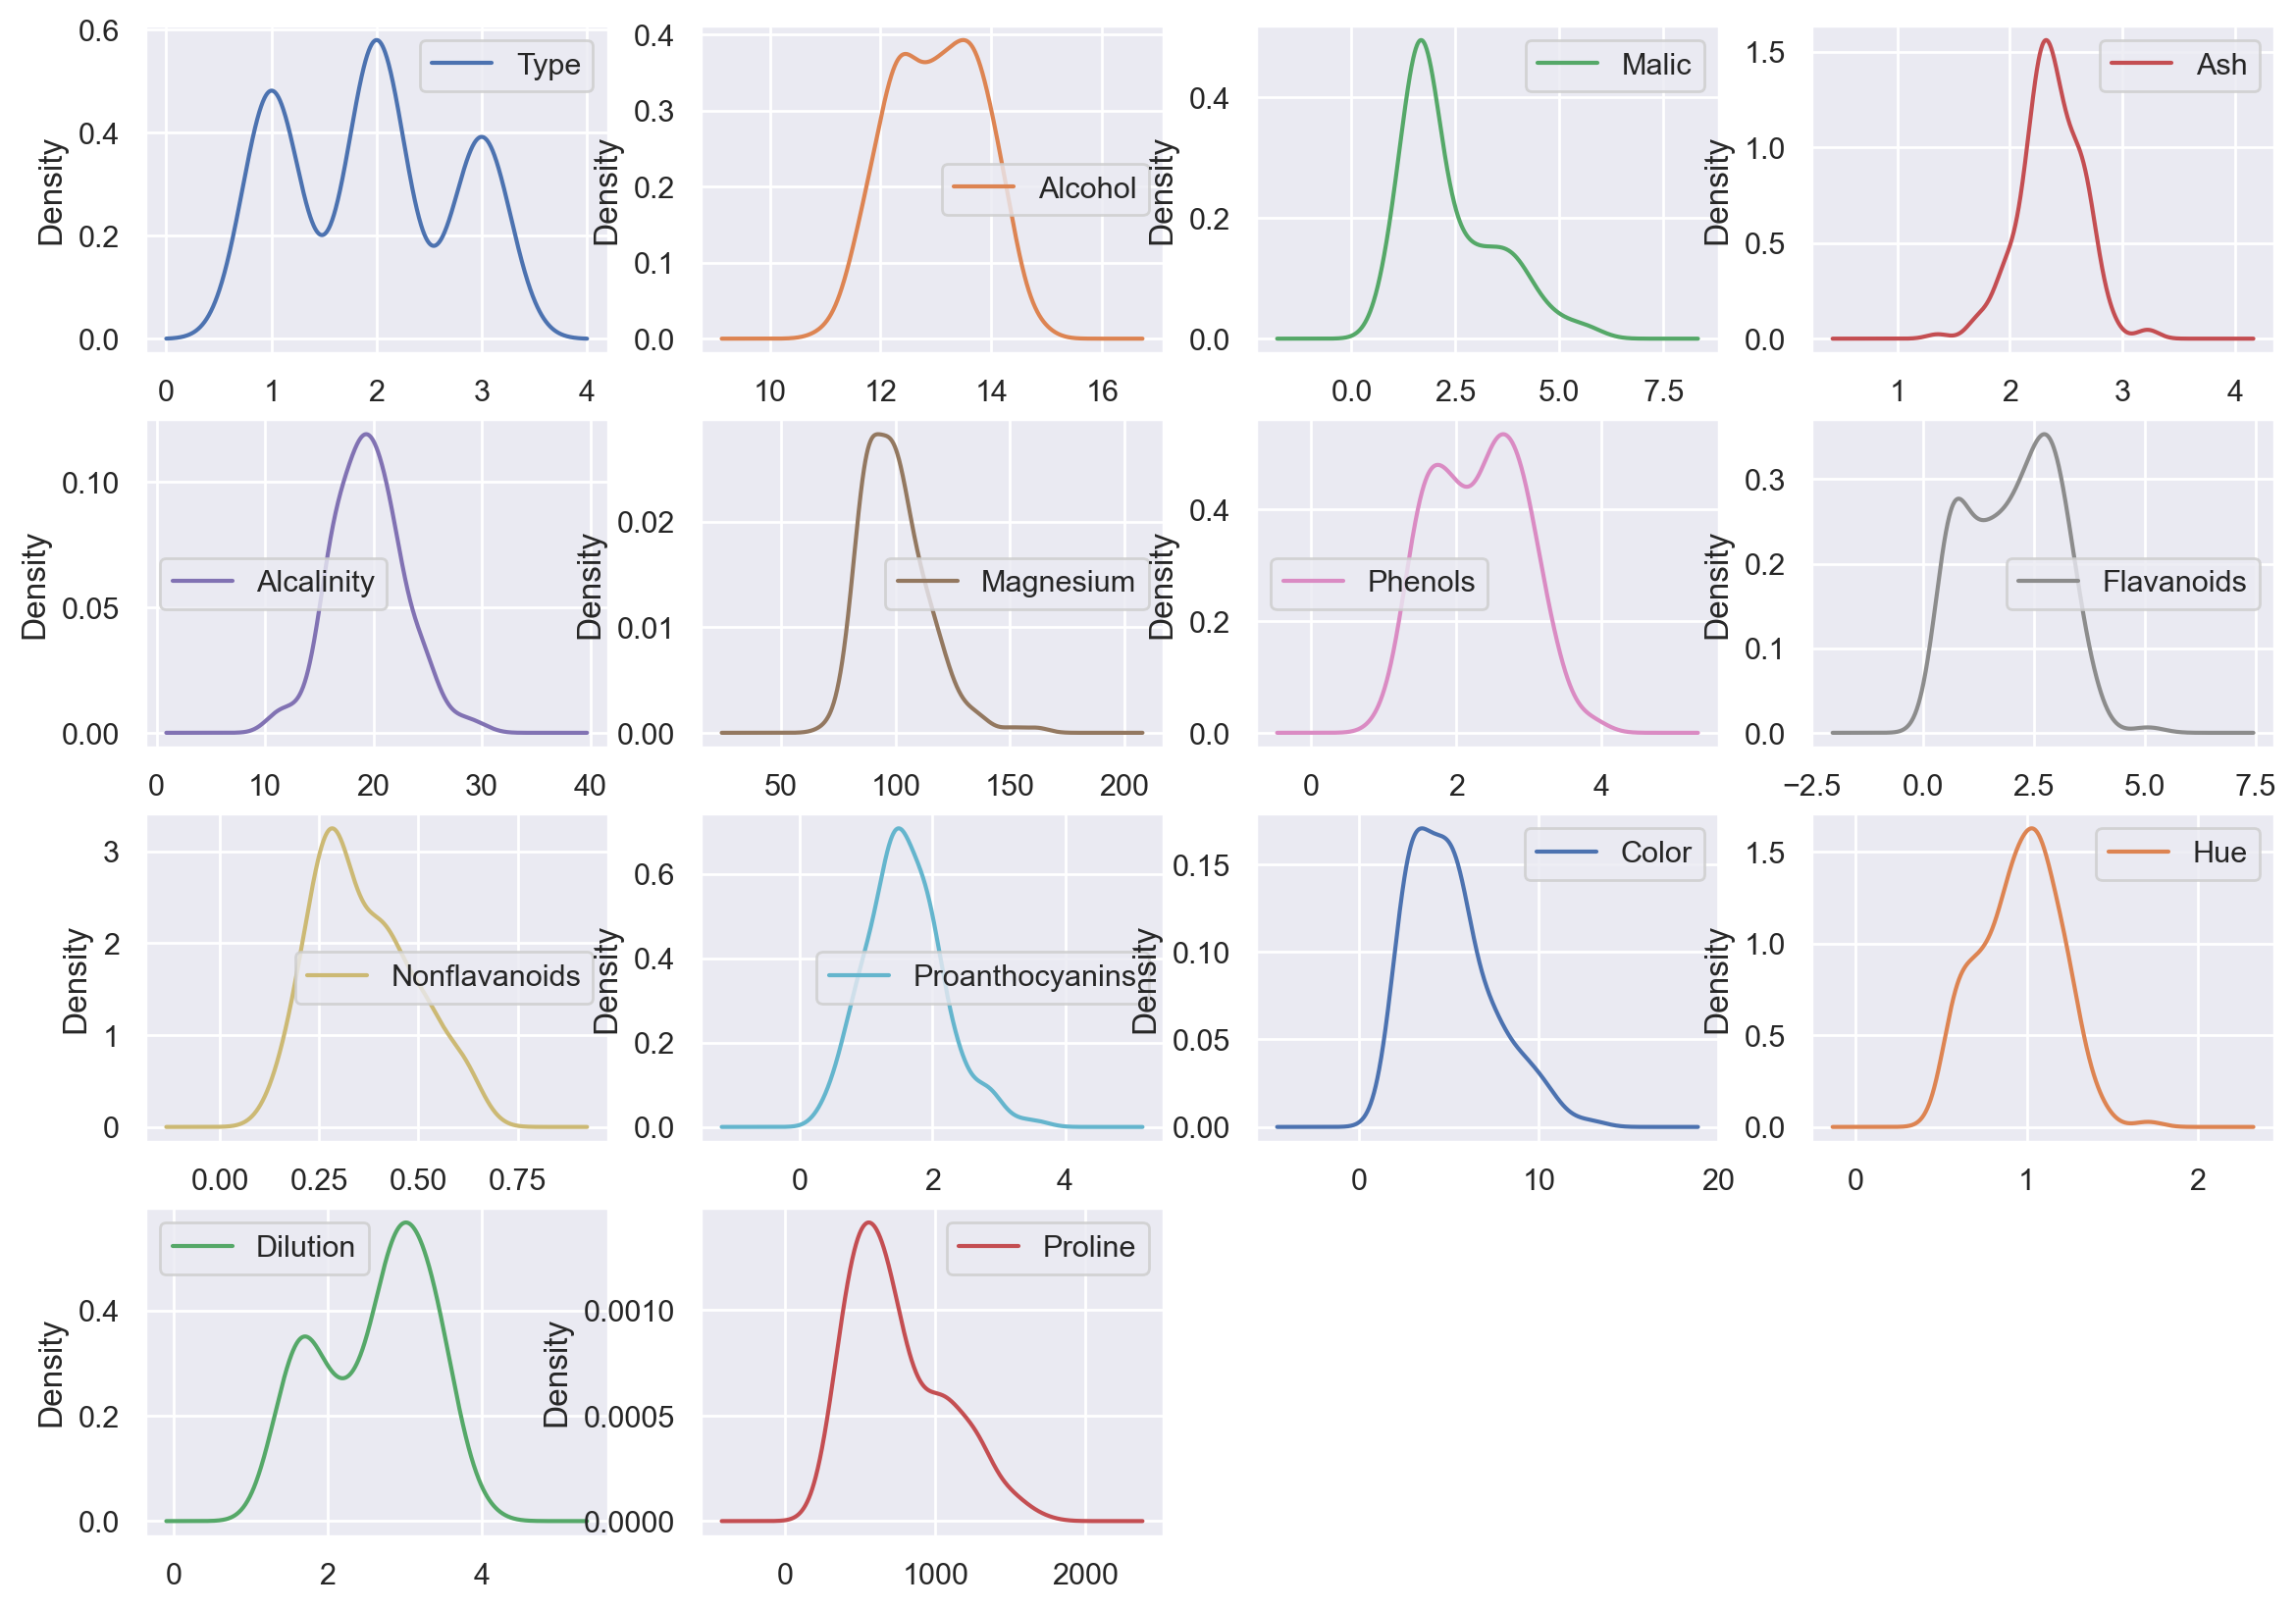

In [9]:
#Density plot
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(14, 10))

<Axes: >

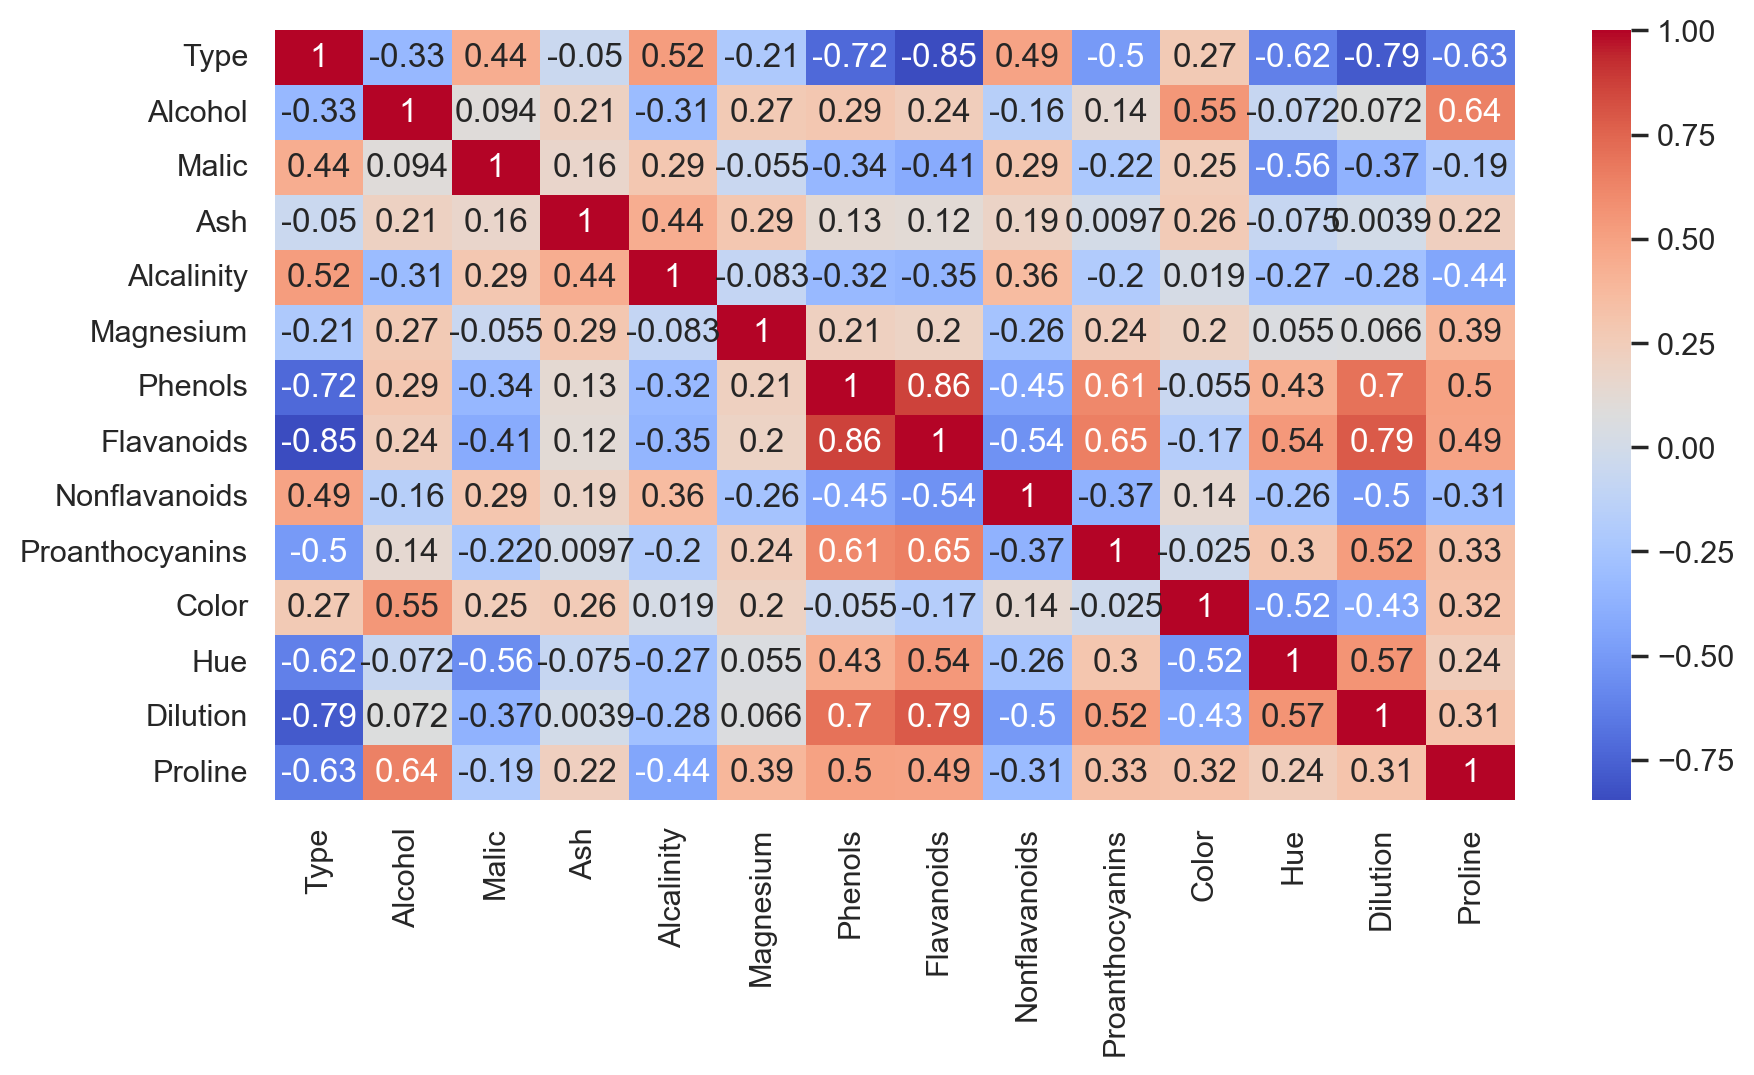

In [10]:
#corr relation 
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')

Dimensionality Reduction with PCA:

In [35]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [36]:
pca = PCA()
pcs = pca.fit_transform(x)

In [37]:
pcs

array([[-3.26057965,  1.73605368, -0.40570071, ...,  0.46583555,
         0.48680495,  0.29467459],
       [-2.35861968, -0.50978608, -1.93709416, ...,  0.37890374,
         0.18232782,  0.10539043],
       [-2.45337567,  1.12070389,  0.89283399, ...,  0.03379623,
        -0.11503536, -0.16136859],
       ...,
       [ 3.38413439,  2.2552852 , -1.13303862, ...,  0.74871426,
        -0.2186221 , -0.07585076],
       [ 3.07820438,  1.79110432, -0.63949951, ...,  0.36624426,
         0.07604201,  0.03518418],
       [ 3.63936086,  2.65865821,  0.74693107, ..., -0.24488784,
         0.24173434, -0.16517022]])

In [38]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.260580,1.736054,-0.405701,0.687419,0.200386,-0.359880,0.632731,0.046907,-0.820645,0.618012,0.465836,0.486805,0.294675
1,-2.358620,-0.509786,-1.937094,0.080793,-0.530808,-0.934456,0.010388,-1.011932,-0.112133,-0.187387,0.378904,0.182328,0.105390
2,-2.453376,1.120704,0.892834,-0.782643,0.378624,0.569583,0.415002,0.114857,-0.576821,-0.922386,0.033796,-0.115035,-0.161369
3,-3.253148,2.686416,-0.411249,-0.555531,0.087066,0.271407,-0.414701,-0.644758,0.281428,0.626387,-0.178538,0.324122,-0.197160
4,-1.403734,1.320100,1.854434,0.503217,-0.285707,-0.666474,0.515031,-0.347955,-0.184441,-0.123972,-0.269699,-0.190014,-0.338264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.886054,1.707484,-0.443465,-1.264981,-0.032341,-1.103732,0.851965,0.215097,0.414076,-0.093161,0.177757,0.181033,0.034659
174,3.148970,1.386257,0.127645,-0.165248,0.457328,-0.006777,0.108374,0.530442,0.253675,-0.026677,-0.250032,0.086710,-0.127952
175,3.384134,2.255285,-1.133039,0.505402,1.098278,0.071138,0.708909,-0.072243,0.348921,0.155599,0.748714,-0.218622,-0.075851
176,3.078204,1.791104,-0.639500,1.109167,0.294664,1.019720,0.737921,-0.440155,-0.289070,0.444341,0.366244,0.076042,0.035184


In [39]:
pca.explained_variance_ratio_

array([0.3996507 , 0.16770494, 0.10920338, 0.0683296 , 0.06528109,
       0.05148865, 0.04248671, 0.02680753, 0.02028839, 0.01995798,
       0.01304329, 0.01042324, 0.00533449])

In [40]:
np.cumsum(pca.explained_variance_ratio_) #for adding each value like this pc1,pc1+pc2,pc1+pc2+pc3,

array([0.3996507 , 0.56735564, 0.67655902, 0.74488863, 0.81016972,
       0.86165837, 0.90414508, 0.93095261, 0.951241  , 0.97119898,
       0.98424227, 0.99466551, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

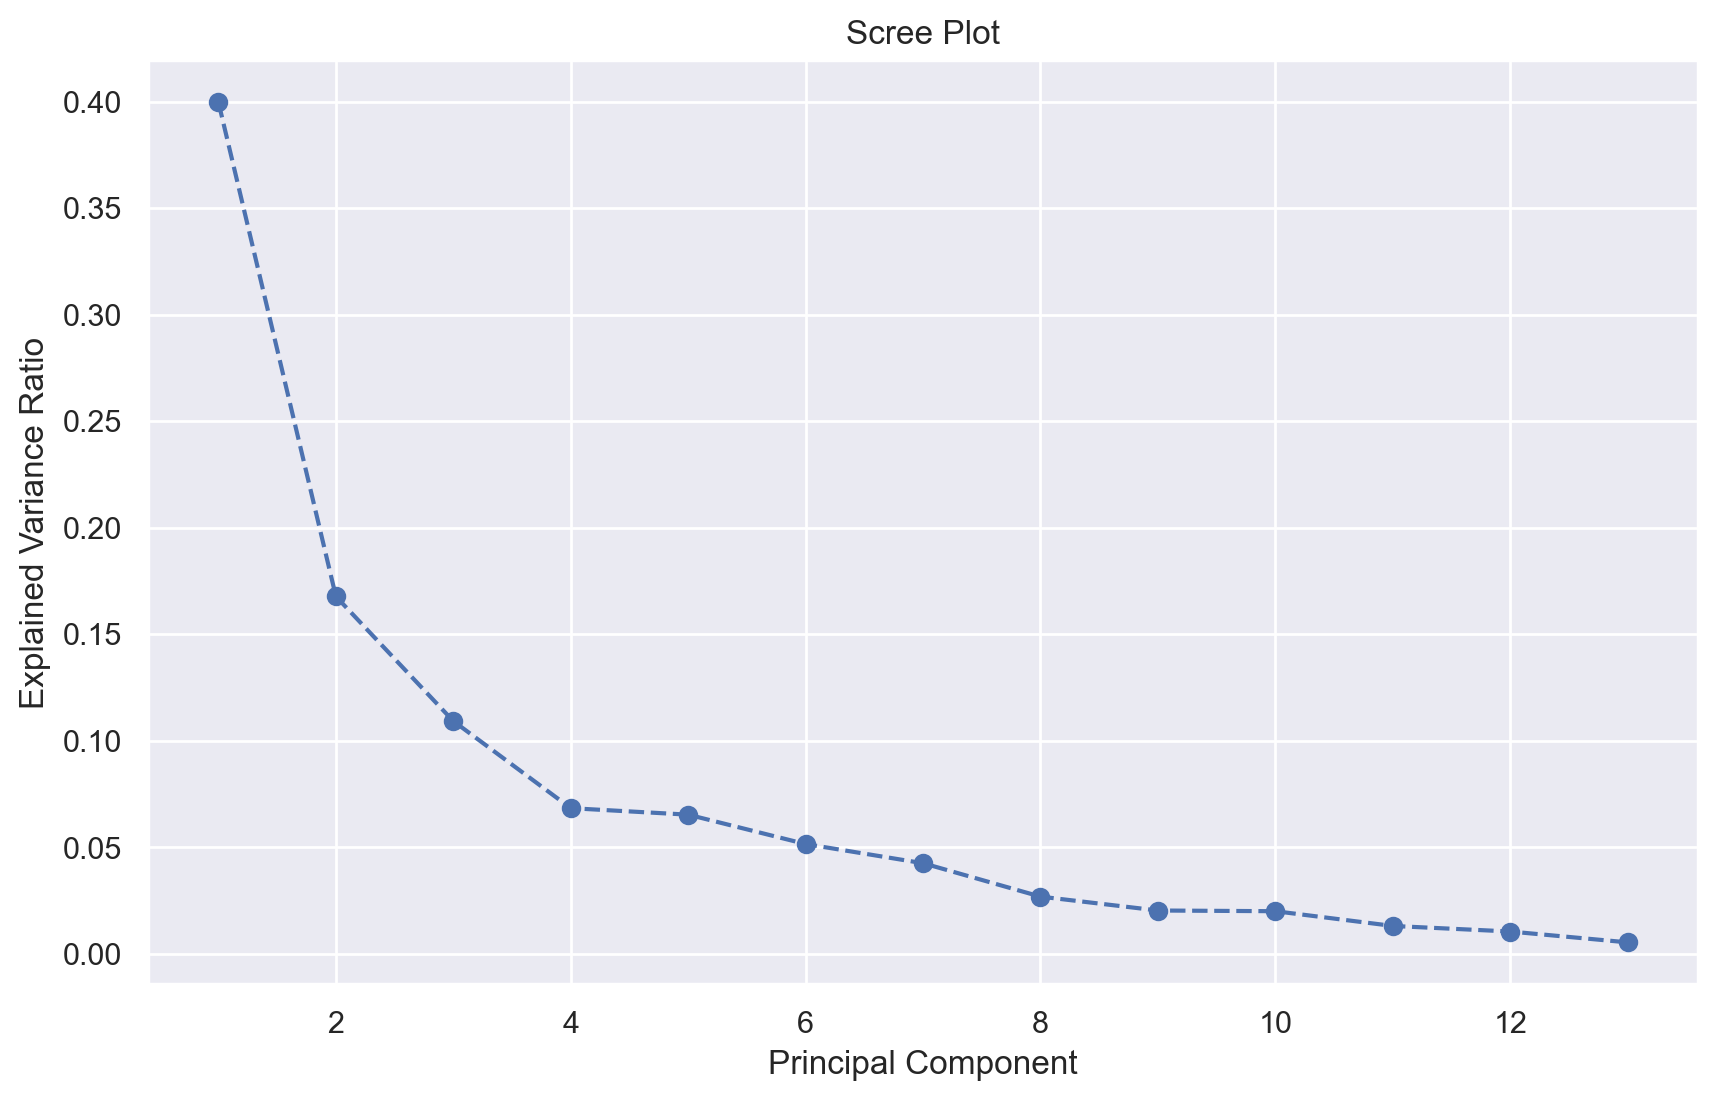

In [41]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

Text(0.5, 1.0, 'Cumulative Explained Variance Plot')

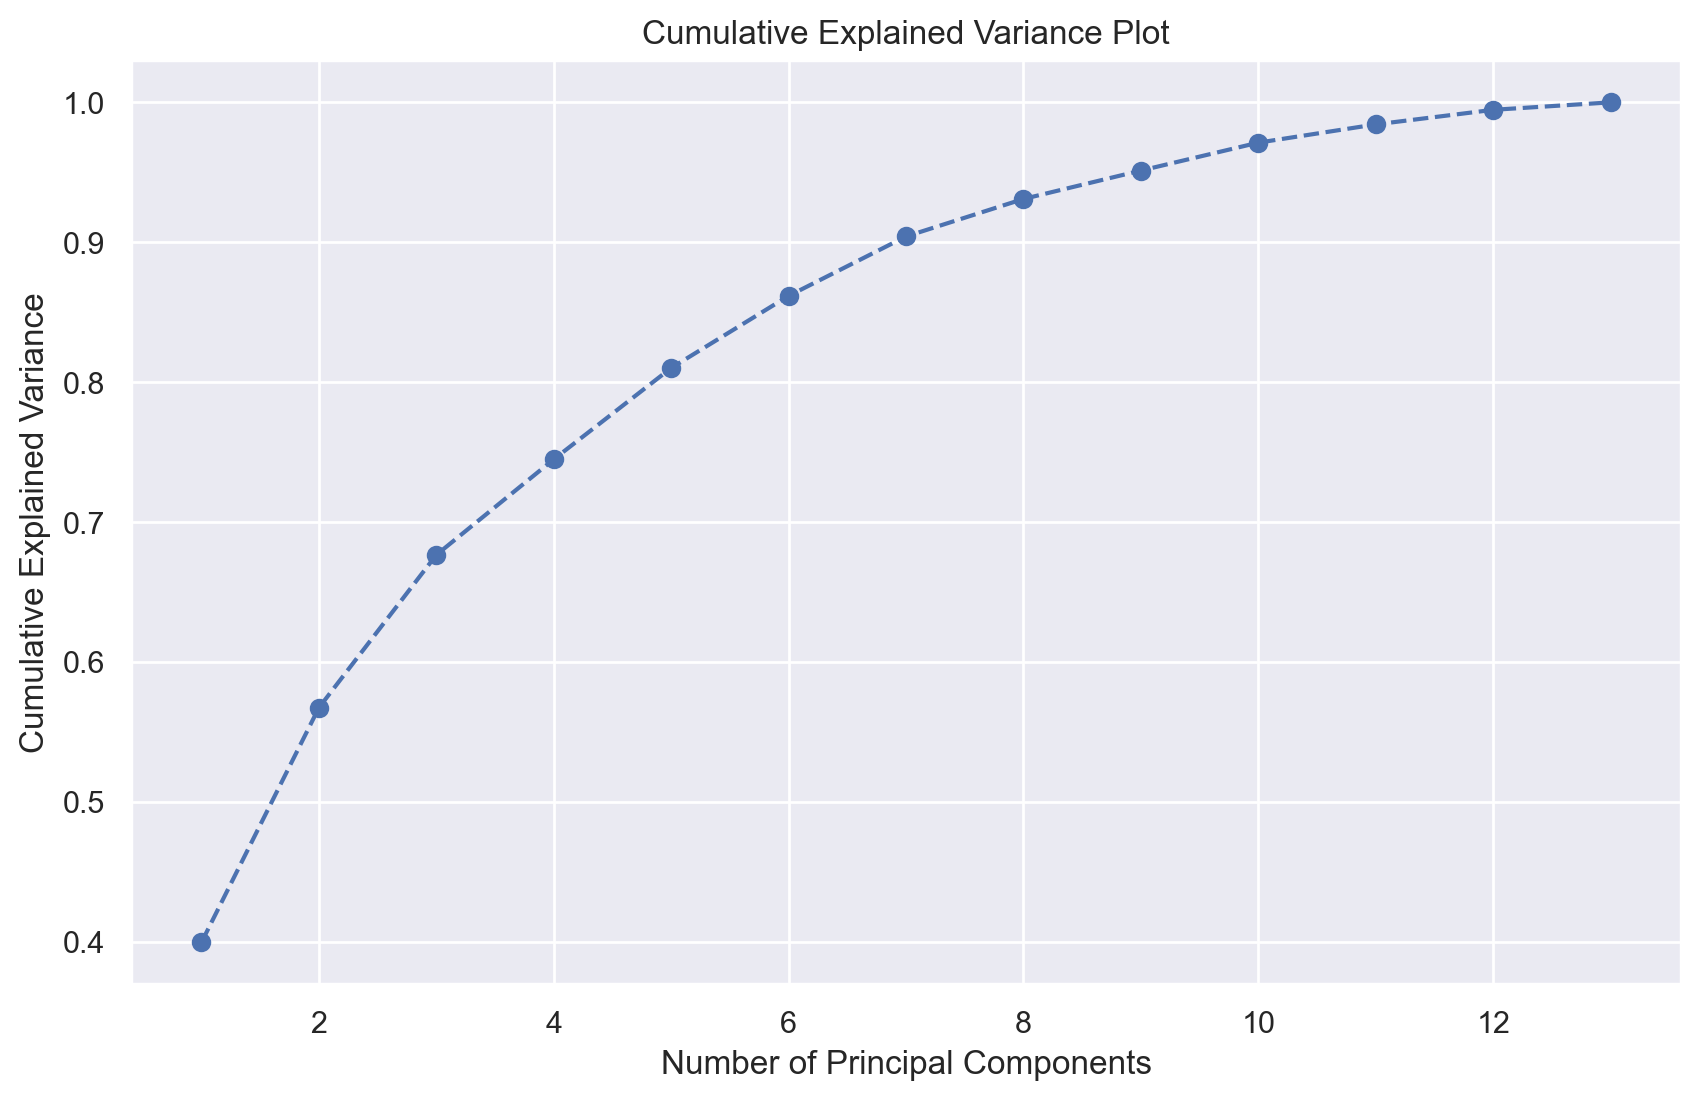

In [44]:
# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')

In [45]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[-3.26057965e+00,  1.73605368e+00],
       [-2.35861968e+00, -5.09786078e-01],
       [-2.45337567e+00,  1.12070389e+00],
       [-3.25314826e+00,  2.68641563e+00],
       [-1.40373438e+00,  1.32009994e+00],
       [-2.65512183e+00,  1.82637321e+00],
       [-2.29445488e+00,  8.97163397e-01],
       [-1.89667452e+00,  1.35025982e+00],
       [-2.54674258e+00,  9.04948179e-01],
       [-2.78639187e+00,  9.08683615e-01],
       [-3.07749329e+00,  9.95800043e-01],
       [-1.67788269e+00,  1.44036671e-01],
       [-1.98590276e+00,  2.64713679e-01],
       [-3.35259001e+00,  1.18028765e+00],
       [-3.76517649e+00,  1.86251908e+00],
       [-2.10015090e+00,  1.41544838e+00],
       [-1.95029758e+00,  2.22979921e+00],
       [-1.86099316e+00,  1.62409458e+00],
       [-2.90877757e+00,  2.01404418e+00],
       [-2.30532968e+00,  1.43176472e+00],
       [-3.34283776e+00,  1.38150053e+00],
       [-1.49795635e+00,  5.86247682e-01],
       [-2.67807345e+00, -2.63052480e-02],
       [-1.

In [46]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data

,PC1,PC2
0,-3.260580,1.736054
1,-2.358620,-0.509786
2,-2.453376,1.120704
3,-3.253148,2.686416
4,-1.403734,1.320100
...,...,...
173,3.886054,1.707484
174,3.148970,1.386257
175,3.384134,2.255285
176,3.078204,1.791104


In [47]:
y

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
173     740
174     750
175     835
176     840
177     560
Name: Proline, Length: 178, dtype: int64

In [48]:
data['Class'] = y

In [49]:
data

,PC1,PC2,Class
0,-3.260580,1.736054,1065
1,-2.358620,-0.509786,1050
2,-2.453376,1.120704,1185
3,-3.253148,2.686416,1480
4,-1.403734,1.320100,735
...,...,...,...
173,3.886054,1.707484,740
174,3.148970,1.386257,750
175,3.384134,2.255285,835
176,3.078204,1.791104,840


<Axes: xlabel='PC1', ylabel='PC2'>

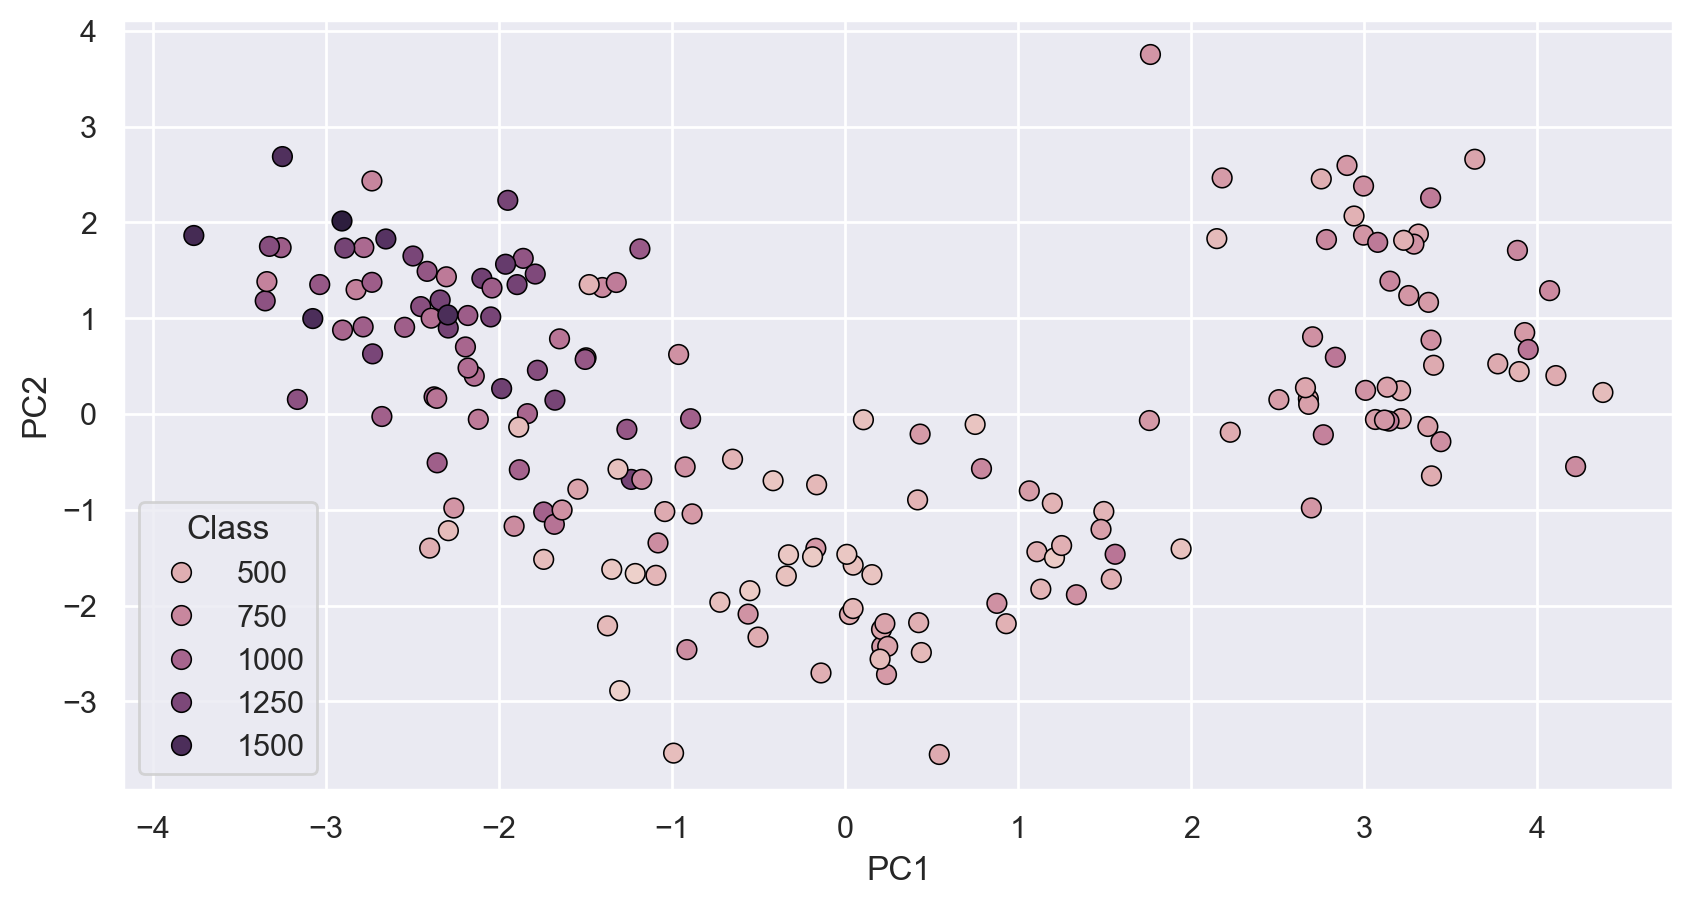

In [50]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['Class'])

In [62]:
x = data.iloc[:,:-1]
y = data['Class']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [66]:
km = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = km.fit_predict(df)
km

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'K-Means Clustering Results')

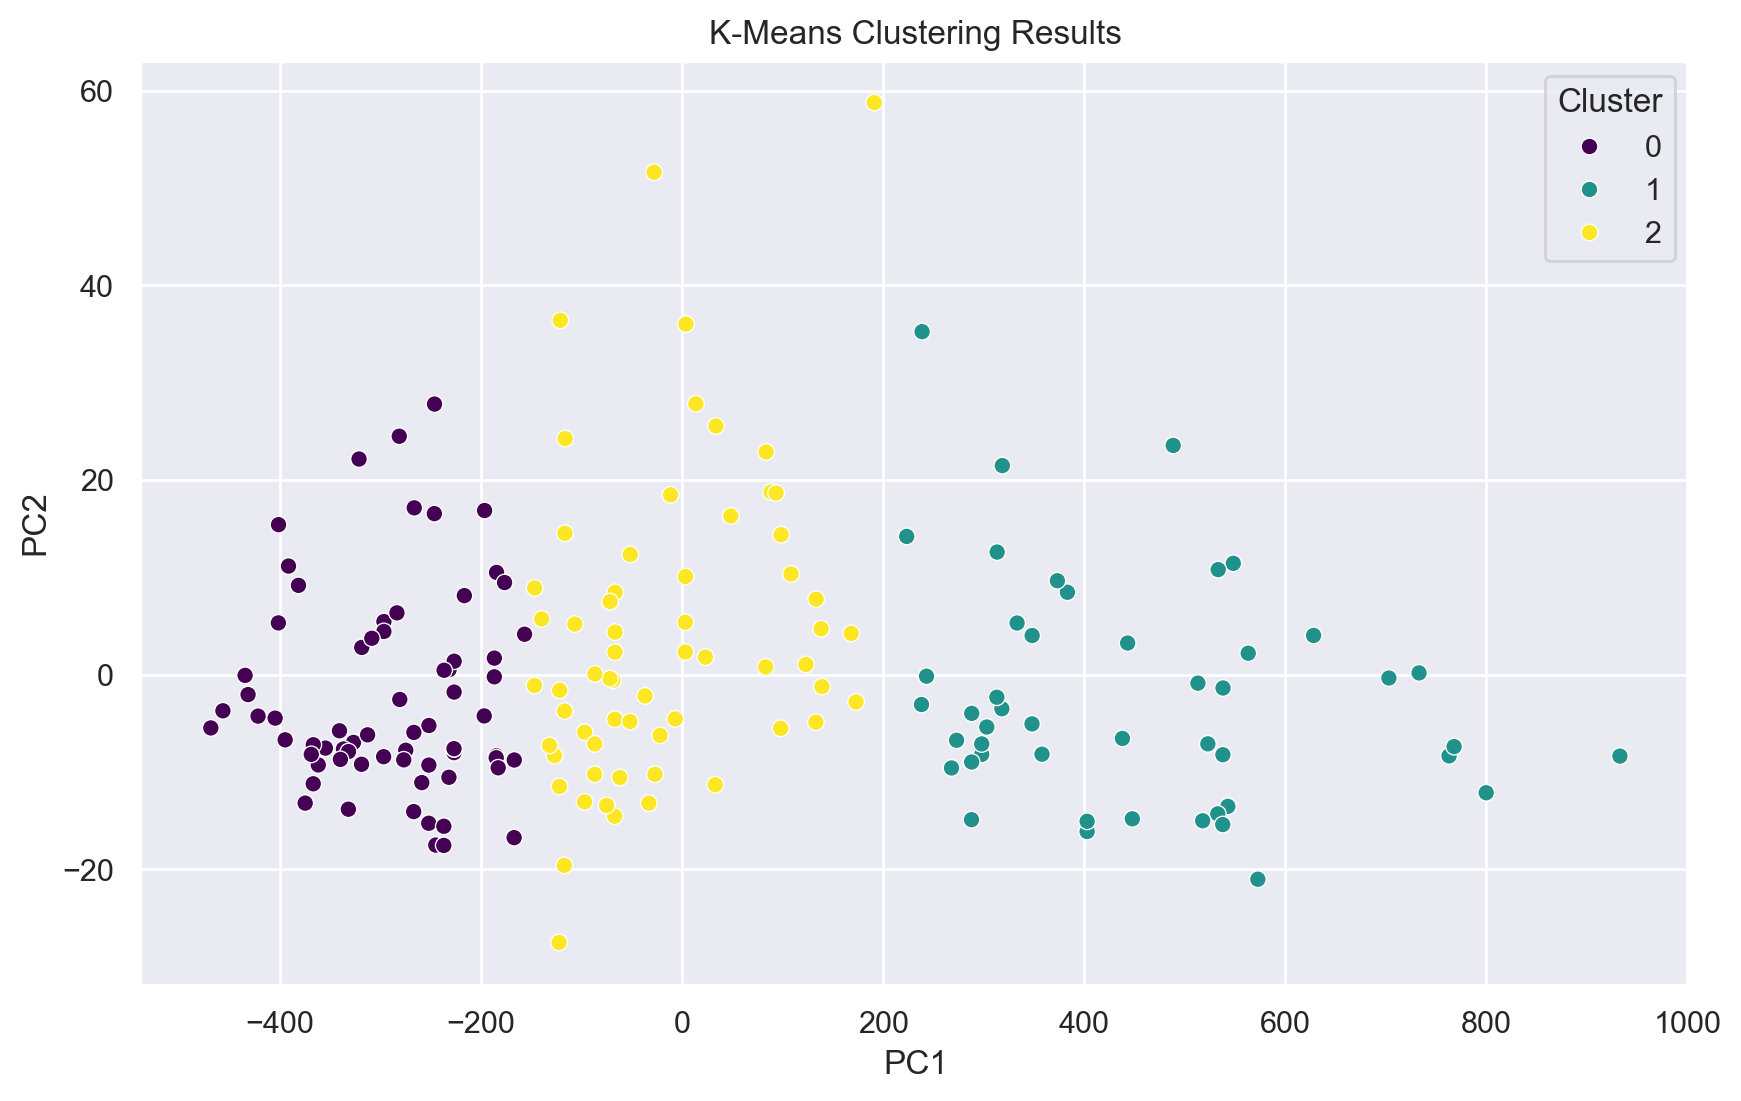

In [67]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results')

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
sil_score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f'Davies–Bouldin Index: {db_index}')

Silhouette Score: 0.5711220218931753
Davies–Bouldin Index: 0.5342660703679668


Task 4: Clustering with PCA Data:

In [69]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans_pca.fit_predict(df_pca)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


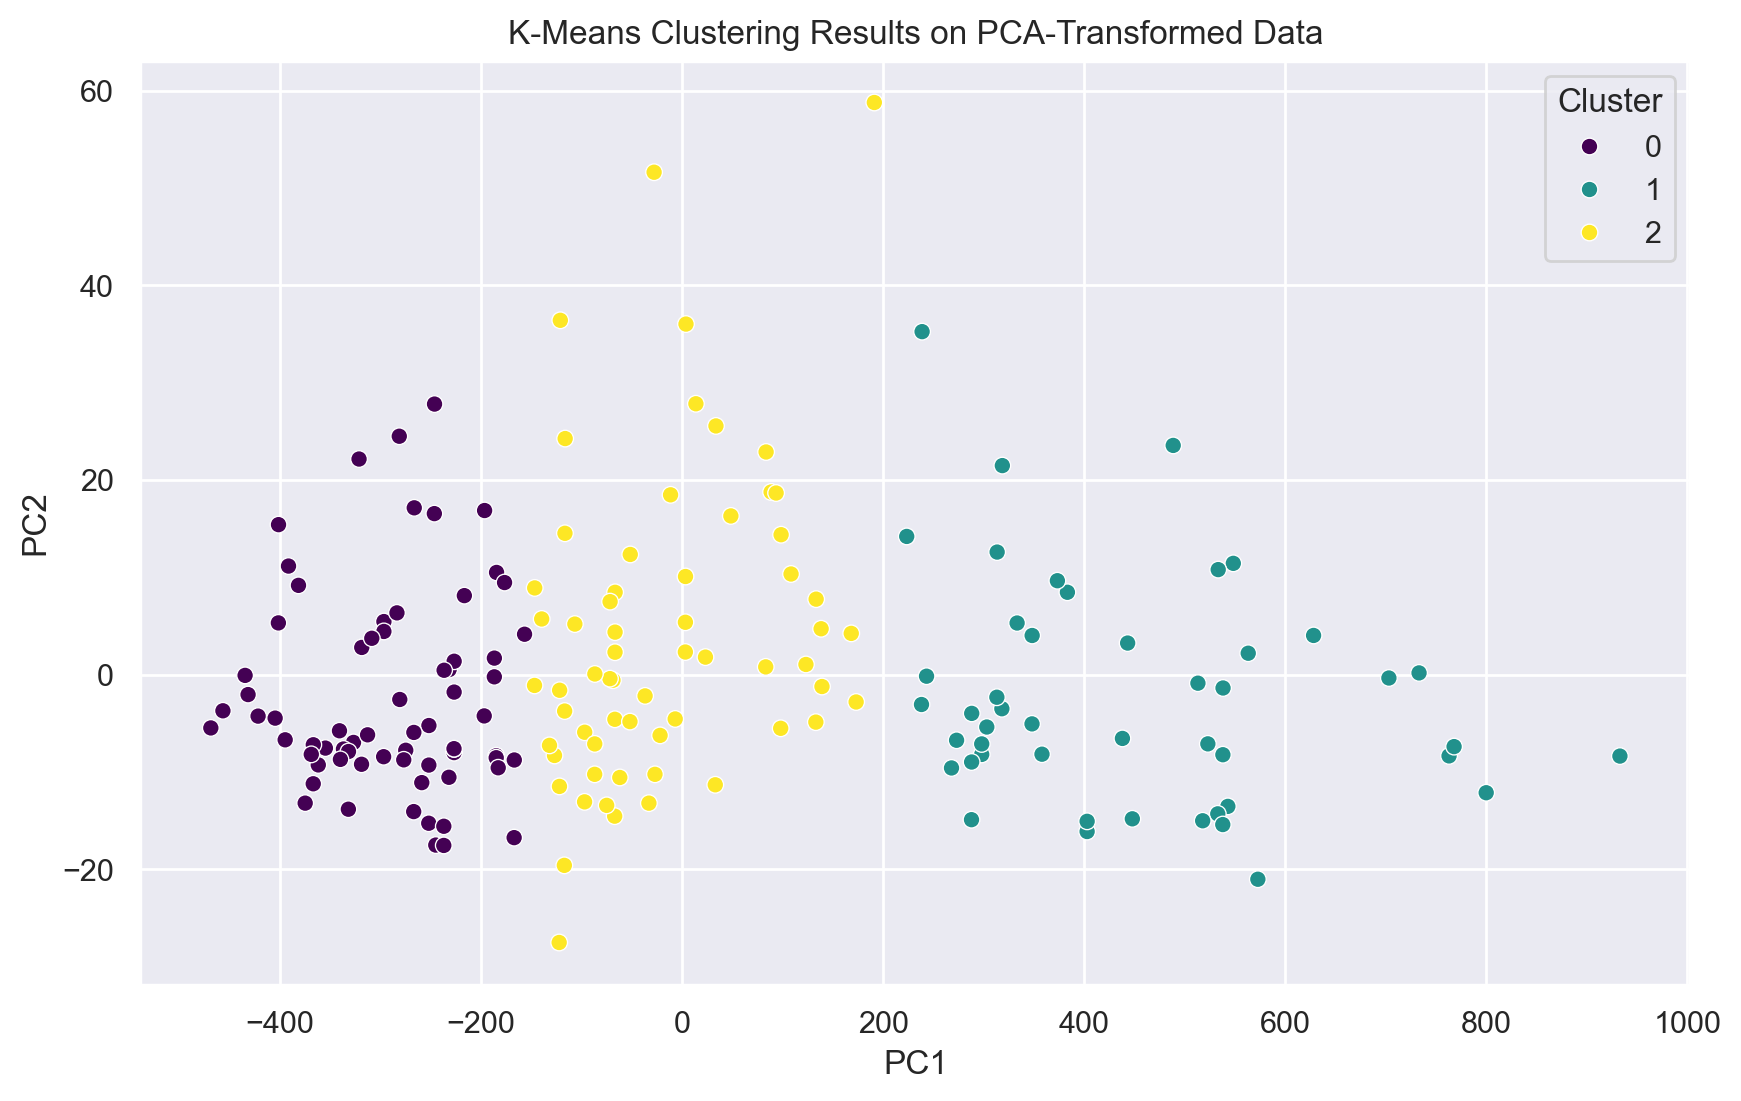

In [70]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results on PCA-Transformed Data')
plt.show()

In [71]:
# Calculate silhouette score for PCA-transformed data
sil_score_pca = silhouette_score(df_pca.drop('Cluster', axis=1), df_pca['Cluster'])
print(f'Silhouette Score (PCA): {sil_score_pca}')

# Calculate Davies–Bouldin index for PCA-transformed data
db_index_pca = davies_bouldin_score(df_pca.drop('Cluster', axis=1), df_pca['Cluster'])
print(f'Davies–Bouldin Index (PCA): {db_index_pca}')

Silhouette Score (PCA): 0.5722558407969057
Davies–Bouldin Index (PCA): 0.5329679676724882


In [72]:
print(f'Silhouette Score (Original): {sil_score}')
print(f'Davies–Bouldin Index (Original): {db_index}')
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies–Bouldin Index (PCA): {db_index_pca}')

Silhouette Score (Original): 0.5711220218931753
Davies–Bouldin Index (Original): 0.5342660703679668
Silhouette Score (PCA): 0.5722558407969057
Davies–Bouldin Index (PCA): 0.5329679676724882


Task 6: Conclusion and Insights

#Summarize the key findings and insights from the assignment.

In [73]:
#EDA revealed key insights into feature distribution and correlations
#PCA reduced dimensionality while preserving variance
#clustering on PCA improved performance metrics compared to the original datasets.

2.	Discuss the practical implications of using PCA and clustering in data analysis.

In [75]:
#PCA improve cluster performance by reducing nosie and computational complexity.
#lustering results are more interpretable and visually distinct in lower-dimensional space.

3.	Provide recommendations for when to use each technique based on the analysis conducted.

In [ ]:
#use pCA when dealing with high-dimensional data to improve clustering performance and visulaization.
#Direct clustering is suitable for low-dimensional datasets where feature relationship are straightforward.